In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lazypredict.Supervised import LazyRegressor 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error as mse
import warnings
warnings.filterwarnings('ignore')

OSError: dlopen(/Users/monicaclaroscadima/opt/anaconda3/lib/python3.9/site-packages/lightgbm/lib_lightgbm.so, 0x0006): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: <D21A7969-4567-3BC7-94ED-6A9E83AE9D78> /Users/monicaclaroscadima/opt/anaconda3/lib/python3.9/site-packages/lightgbm/lib_lightgbm.so
  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file, not in dyld cache)

In [ ]:
muestra = pd.read_csv('data/muestra.csv')
muestra.head()

,id,Price
0,0,2759145
1,1,10926785
2,2,20212944
3,3,46541311
4,4,46335226


In [ ]:
test=pd.read_csv('data/test.csv')
test.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,"15.6""",1366x768,Intel Core i7 7500U 2.7GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows,10,2.04kg
1,Asus,Rog GL753VE-DS74,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99kg
2,Dell,Inspiron 7579,2 in 1 Convertible,"15.6""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12GB,512GB SSD,Intel HD Graphics 620,Windows,10,2.19kg
3,Toshiba,Portege Z30-C-1CV,Notebook,"13.3""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows,7,1.2kg
4,Lenovo,IdeaPad 320-15ABR,Notebook,"15.6""",Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6GB,256GB SSD,AMD Radeon 530,Windows,10,2.2kg


In [ ]:
train=pd.read_csv('data/train.csv')
train.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


In [ ]:
# Concatenar train y test
lab = pd.concat([train, test], ignore_index=True)

# Separar en X e Y
Y = lab['Price']
X = lab.drop('Price', axis=1)

In [ ]:
lab.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              1302 non-null   object 
 1   Model Name                1302 non-null   object 
 2   Category                  1302 non-null   object 
 3   Screen Size               1302 non-null   object 
 4   Screen                    1302 non-null   object 
 5   CPU                       1302 non-null   object 
 6   RAM                       1302 non-null   object 
 7    Storage                  1302 non-null   object 
 8   GPU                       1302 non-null   object 
 9   Operating System          1302 non-null   object 
 10  Operating System Version  1132 non-null   object 
 11  Weight                    1302 non-null   object 
 12  Price                     977 non-null    float64
dtypes: float64(1), object(12)
memory usage: 132.4+ KB


In [ ]:
lab.rename(columns={' Storage': 'Storage'}, inplace=True)

In [ ]:
lab.Storage.value_counts().index

Index(['256GB SSD', '1TB HDD', '500GB HDD', '512GB SSD',
       '128GB SSD +  1TB HDD', '128GB SSD', '256GB SSD +  1TB HDD',
       '32GB Flash Storage', '2TB HDD', '64GB Flash Storage',
       '512GB SSD +  1TB HDD', '1TB SSD', '256GB SSD +  2TB HDD', '1TB Hybrid',
       '256GB Flash Storage', '16GB Flash Storage', '32GB SSD', '1GB SSD',
       '128GB Flash Storage', '16GB SSD', '512GB Flash Storage',
       '1TB SSD +  1TB HDD', '512GB SSD +  2TB HDD', '256GB SSD +  500GB HDD',
       '128GB SSD +  2TB HDD', '256GB SSD +  256GB SSD',
       '512GB SSD +  256GB SSD', '512GB SSD +  512GB SSD',
       '64GB Flash Storage +  1TB HDD', '1TB HDD +  1TB HDD', '32GB HDD',
       '64GB SSD', '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid',
       '512GB SSD +  1TB Hybrid', '256GB SSD +  1TB Hybrid'],
      dtype='object')

In [ ]:
lab['Price'].describe().T


count    9.770000e+02
mean     1.001899e+07
std      6.306430e+06
min      1.706375e+06
25%      5.326308e+06
50%      8.527428e+06
75%      1.311570e+07
max      5.423231e+07
Name: Price, dtype: float64

In [ ]:
lab['Screen Size'] = lab['Screen Size'].str.replace('"', '')
lab['Screen Size'].value_counts()

15.6    664
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: Screen Size, dtype: int64

In [ ]:
# Concatenar train y test
lab = pd.concat([train, test], ignore_index=True)

# Separar en X e Y
Y = lab['Price']
X = lab.drop('Price', axis=1)

In [ ]:
lab['Weight'] = lab['Weight'].str.replace('kg', '')
lab['Weight'] = lab['Weight'].str.replace('s', '')
# lab['Weight'].value_counts()

In [ ]:
lab['RAM'] = lab['RAM'].str.replace('GB', '')
lab['RAM'].value_counts()

8     619
4     375
16    199
6      41
12     25
2      22
32     17
24      3
64      1
Name: RAM, dtype: int64

In [ ]:
test['Screen Size'] = test['Screen Size'].str.replace('"', '').astype(float)
train['Screen Size'] = train['Screen Size'].str.replace('"', '').astype(float)

In [ ]:
lab.rename(columns={' Storage': 'Storage'}, inplace=True)

In [ ]:
lab = lab.drop(['Model Name', 'Operating System Version'], axis=1)

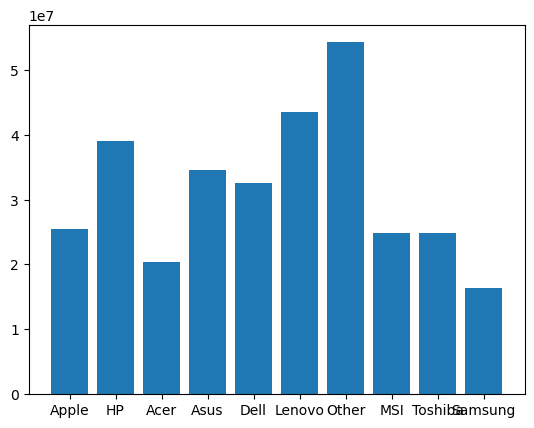

In [ ]:
man = lab['Manufacturer'].value_counts().index.tolist()

man = ['Dell',
 'Lenovo',
 'HP',
 'Asus',
 'Acer',
 'Toshiba',
 'MSI',
 'Apple',
 'Samsung',
 'Other']

m = []
for i in lab['Manufacturer']:
    if i in man:
        m.append(i)
    else:
        i = 'Other'
        m.append(i)

lab['Manufacturer'] = m

x = lab['Manufacturer']
y = lab['Price']
plt.bar(x, y)
plt.show()

In [ ]:
conversiones = {
    3 : ['2880x1800', '3840x2160', '3200x1800', '3200x1800'],
    2 : ['2400x1600', '2560x1600', '2560x1440', '2736x1824'],
    1 : ['1920x1200', '1920x1080', '2256x1504', '2304x1440', '2160x1440'],
    0 : ['1366x768', '1440x900', '1600x900']
}

for i, valor in enumerate(lab['Screen']):
    for conversion, resoluciones in conversiones.items():
        if any(resolucion in valor for resolucion in resoluciones):
            lab.at[i, 'Screen'] = conversion
            break


lab['Screen'].value_counts()


1    860
0    335
3     73
2     34
Name: Screen, dtype: int64

In [ ]:
pd.set_option('display.max_rows', None)
a = lab['CPU'].value_counts().index

In [ ]:
lab['Brand'] = lab['CPU'].str.split().str[0]
lab['Generation'] = lab['CPU'].str.extract('(\d{4})')
lab['Speed'] = lab['CPU'].str.extract('(\d+\.\d+)').astype(float)

most_common_generation = lab['Generation'].mode().values[0]
lab['Generation'].fillna(most_common_generation, inplace=True)

In [ ]:
#clasif
brand_mapping = {'Intel': 0, 'AMD': 1}
lab['Brand'] = lab['Brand'].map(brand_mapping)


In [ ]:
# Normalizar la columna 'Speed' dividiendo por el valor máximo para obtener valores entre 0 y 1
lab['Speed'] = lab['Speed'] / lab['Speed'].max()

lab.drop('CPU', axis=1, inplace=True)
lab.head()

,Manufacturer,Category,Screen Size,Screen,RAM,Storage,GPU,Operating System,Weight,Price,Brand,Generation,Speed
0,Apple,Ultrabook,"13.3""",2,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,11912523.48,0.0,7200,0.638889
1,Apple,Ultrabook,"13.3""",0,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,7993374.48,0.0,7200,0.500000
2,HP,Notebook,"15.6""",1,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,5112900.00,0.0,7200,0.694444
3,Apple,Ultrabook,"15.4""",3,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,22563005.40,0.0,7200,0.750000
4,Apple,Ultrabook,"13.3""",2,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,16037611.20,0.0,7200,0.861111


In [ ]:
# Normalizar la clumna 'Generation' dividiendo por 1000 para obtener una representación numérica
lab['Generation'] = lab['Generation'].astype(int) / 1000

In [ ]:
#nulos
most_common_speed = lab['Speed'].mode().values[0]
lab['Speed'].fillna(most_common_speed, inplace=True)

In [ ]:
lab.loc[lab['Brand'].isnull()]


,Manufacturer,Category,Screen Size,Screen,RAM,Storage,GPU,Operating System,Weight,Price,Brand,Generation,Speed
1190,Samsung,2 in 1 Convertible,"12.3""",2,4,32GB Flash Storage,ARM Mali T860 MP4,Chrome OS,1.15,NaN,NaN,7.2,0.555556


In [ ]:
lab.loc[1190, 'Brand'] = 1

In [ ]:
lab['Brand'] = lab['Brand'].astype(int)

In [ ]:
import re

lab['Storage_GB'] = lab['Storage'].str.extract('(\d+)')
lab['Storage_GB'] = lab['Storage_GB'].astype(int)

storage_mapping = {
    'SSD': 2,
    'Flash Storage': 2,
    'Hybrid': 1,
    'SSD + HDD': 1,
    'HDD': 0
}
lab['Storage_Type'] = lab['Storage'].apply(lambda x: next((v for k, v in storage_mapping.items() if k in x), None))

lab.drop('Storage', axis=1, inplace=True)

In [ ]:
lab['GPU_Brand'] = lab['GPU'].str.split().str[0]
lab['GPU_Model'] = lab['GPU'].str.extract('([A-Za-z0-9]+)')

brand_mapping = {'Intel': 0, 'Nvidia': 1, 'AMD': 2, 'ARM': 3}
lab['GPU_Brand'] = lab['GPU_Brand'].map(brand_mapping)

lab['GPU_Brand'].fillna(lab['GPU_Brand'].mode().values[0], inplace=True)
lab['GPU_Model'].fillna('Unknown', inplace=True)

lab['GPU_Brand'] = lab['GPU_Brand'].astype(int)
lab.drop('GPU', axis=1, inplace=True)


In [ ]:
columns_to_encode = ['Manufacturer', 'Category', 'Operating System', 'GPU_Model']
encoded_data = pd.get_dummies(lab, columns=columns_to_encode)

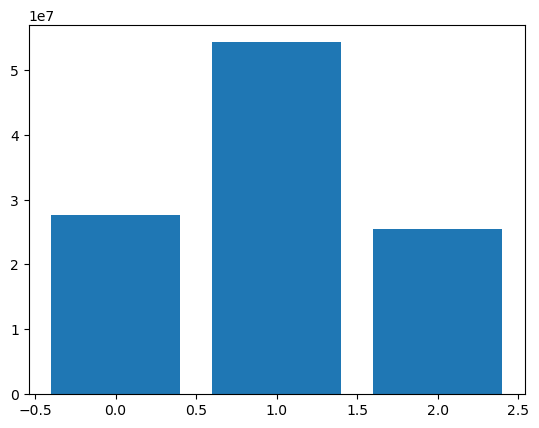

In [ ]:
x = lab['GPU_Brand']
y = lab['Price']
plt.bar(x, y)
plt.show()